In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [2]:
# Read data into a DataFrame.
data_url = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [4]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [5]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [6]:
lm.rsquared

0.89721063817895219

#### Drill: dropping features and re-fitting

In [7]:
linear_formula = 'Sales ~ TV+Radio'
lm = smf.ols(formula=linear_formula, data=data).fit()

In [8]:
lm.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [9]:
lm.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [10]:
lm.rsquared

0.89719426108289568

The r-squared value remains nearly unchanged, which goes along with the idea that the newspaper variable captured little variance. The parameters on the other variables remain nearly unchanged as well, also supporting that the newspaper feature capture very little variance.

#### Challenge: Validating a linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

C:\Users\polluxs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
raw_NYC_13 = pd.read_excel("Data/NYC_law_enforcement_2013.xls", header=4)
raw_NYC_14 = pd.read_excel("Data/NYC_law_enforcement_2014.xls", header=4)

In [3]:
def robbery_binary(df):
    if df['Robbery'] > 1:
        return 1
    else:
        return 0

In [4]:
def murder_binary(df):
    if df['Murder and\nnonnegligent\nmanslaughter'] > 1:
        return 1
    else:
        return 0

In [5]:
def data_process(raw):
    raw['Robbery_binary'] = raw.apply(robbery_binary, axis=1)
    raw['Murder_binary'] = raw.apply(murder_binary, axis=1)
    raw['Property_Crime'] = raw['Property\ncrime']
    data = pd.DataFrame()
    data['Property_Crime'] = raw['Property\ncrime']
    data['Murder'] = raw['Murder_binary']
    data['Robbery'] = raw['Robbery_binary']
    data['Population'] = raw['Population']
    data['Pop_Squared'] = raw['Population']**2
    data = data.dropna()
    return data

In [6]:
data_13 = data_process(raw_NYC_13)
data_14 = data_process(raw_NYC_14)

In [7]:
data_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 5 columns):
Property_Crime    348 non-null float64
Murder            348 non-null int64
Robbery           348 non-null int64
Population        348 non-null float64
Pop_Squared       348 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [8]:
formula_13 = 'Property_Crime ~ Murder + Robbery + Population + Pop_Squared'
formula_14 = 'Property_Crime ~ Murder + Robbery + Population + Pop_Squared'

In [ ]:
string formatting 

In [9]:
lm_13 = smf.ols(formula=formula_13, data=data_13).fit()
lm_14 = smf.ols(formula=formula_14, data=data_14).fit()

In [10]:
print(lm_13.params, '\n')
print(lm_13.pvalues, '\n')
print(lm_13.rsquared)

Intercept     -1.114575e+02
Murder         4.466332e+02
Robbery       -1.059008e+02
Population     3.281313e-02
Pop_Squared   -1.897388e-09
dtype: float64 

Intercept      1.398762e-03
Murder         2.703792e-03
Robbery        6.443375e-02
Population     2.249819e-80
Pop_Squared    2.160587e-29
dtype: float64 

0.996232242525


In [11]:
print(lm_14.params, '\n')
print(lm_14.pvalues, '\n')
print(lm_14.rsquared)

Intercept     -9.612024e+01
Murder         4.187766e+02
Robbery       -1.514418e+02
Population     3.132016e-02
Pop_Squared   -1.807959e-09
dtype: float64 

Intercept      1.757043e-03
Murder         1.002207e-03
Robbery        5.211611e-03
Population     2.388860e-88
Pop_Squared    5.769997e-33
dtype: float64 

0.996130517789


In [12]:
variables = ['Murder', 'Robbery', 'Population', 'Pop_Squared']
x_13 = data_13[variables]
y_13 = data_13['Property_Crime']

x_14 = data_14[variables]
y_14 = data_14['Property_Crime']

In [13]:
lin_reg_13 = linear_model.LinearRegression()
lin_reg_13.fit(x_13,y_13)

print('Coefficients: \n', lin_reg_13.coef_)
print('Intercept: \n', lin_reg_13.intercept_)
print('\nR-squared:')
print(lin_reg_13.score(x_13, y_13))
lin_reg_13 = linear_model.LinearRegression()
print(cross_val_score(lin_reg_13, x_13, y_13, cv=5))
print(cross_val_score(linear_model.LinearRegression(), x_13, y_13, cv=10))

Coefficients: 
 [  4.46701518e+02  -1.05897820e+02   3.28129444e-02  -1.89739747e-09]
Intercept: 
 -111.468922903

R-squared:
0.996232242853
[  8.27296371e-01   4.75683736e-01   2.35651913e-01  -2.40638571e+03
   4.73196217e-01]
[  7.99448204e-01   8.15193552e-01  -2.54862038e-03   5.78937503e-01
   3.15302913e-01   2.75969796e-01  -3.54614386e+03   7.87676156e-01
   9.01378151e-01  -9.75555229e-01]


In [14]:
lin_reg_14 = linear_model.LinearRegression()
lin_reg_14.fit(x_14,y_14)

print('Coefficients: \n', lin_reg_14.coef_)
print('Intercept: \n', lin_reg_14.intercept_)
print('\nR-squared:')
print(lin_reg_14.score(x_14, y_14))
lin_reg_14 = linear_model.LinearRegression()
print(cross_val_score(lin_reg_14, x_14, y_14, cv=5))
print(cross_val_score(linear_model.LinearRegression(), x_14, y_14, cv=10))

Coefficients: 
 [  4.18773348e+02  -1.51441120e+02   3.13201224e-02  -1.80796415e-09]
Intercept: 
 -96.1130401978

R-squared:
0.996130517889
[  7.81591636e-01   4.25285377e-01   1.56892512e-01  -2.85529792e+03
   3.49333505e-01]
[  8.12134231e-01   7.72335263e-01   3.37665332e-01   4.36036823e-01
   4.84006209e-01  -4.57752855e-01  -3.65486880e+03   8.64040395e-01
   9.19337216e-01  -1.87515171e+00]


Robbery was the only variable that wasn't significant in both sets. For this reason I'll try a model without the Robbery variable

In [15]:
variables_adj = ['Murder', 'Population', 'Pop_Squared']
x_13 = data_13[variables_adj]
y_13 = data_13['Property_Crime']

x_14 = data_14[variables_adj]
y_14 = data_14['Property_Crime']

In [16]:
lin_reg_13 = linear_model.LinearRegression()
lin_reg_13.fit(x_13,y_13)

print('Coefficients: \n', lin_reg_13.coef_)
print('Intercept: \n', lin_reg_13.intercept_)
print('\nR-squared:')
print(lin_reg_13.score(x_13, y_13))
lin_reg_13 = linear_model.LinearRegression()
print(cross_val_score(lin_reg_13, x_13, y_13, cv=5))
print(cross_val_score(linear_model.LinearRegression(), x_13, y_13, cv=10))

Coefficients: 
 [  4.51133065e+02   3.19132315e-02  -1.79134829e-09]
Intercept: 
 -143.821097214

R-squared:
0.996194439435
[  8.25016126e-01   5.15533479e-01   2.42210288e-01  -1.82989324e+03
   4.87119080e-01]
[  8.10012548e-01   8.14028402e-01   1.91174636e-01   5.81409690e-01
   3.44478642e-01   2.57992289e-01  -2.82195306e+03   7.83659486e-01
   8.96113501e-01  -8.84548800e-01]


In [17]:
lin_reg_14 = linear_model.LinearRegression()
lin_reg_14.fit(x_14,y_14)

print('Coefficients: \n', lin_reg_14.coef_)
print('Intercept: \n', lin_reg_14.intercept_)
print('\nR-squared:')
print(lin_reg_14.score(x_14, y_14))
lin_reg_14 = linear_model.LinearRegression()
print(cross_val_score(lin_reg_14, x_14, y_14, cv=5))
print(cross_val_score(linear_model.LinearRegression(), x_14, y_14, cv=10))

Coefficients: 
 [  4.06057808e+02   3.00425555e-02  -1.65857426e-09]
Intercept: 
 -136.799767167

R-squared:
0.996046307667
[  7.77667093e-01   3.91223262e-01   2.06010530e-01  -2.28427336e+03
   3.92288382e-01]
[  8.23887512e-01   7.69034437e-01   3.45233965e-01   4.02449274e-01
   5.45724852e-01  -4.49433622e-01  -2.98649749e+03   8.53833531e-01
   9.10237195e-01  -1.60969813e+00]


In [18]:
formula_13_adjusted = 'Property_Crime ~ Murder + Population + Pop_Squared'
formula_14_adjusted = 'Property_Crime ~ Murder + Population + Pop_Squared'

In [19]:
lm_13_adjusted = smf.ols(formula=formula_13_adjusted, data=data_13).fit()
lm_14_adjusted = smf.ols(formula=formula_14_adjusted, data=data_14).fit()

In [20]:
print(lm_13_adjusted.params, '\n')
print(lm_13_adjusted.pvalues, '\n')
print(lm_13_adjusted.rsquared)

Intercept     -1.438033e+02
Murder         4.511465e+02
Population     3.191296e-02
Pop_Squared   -1.791333e-09
dtype: float64 

Intercept      2.428873e-06
Murder         2.540970e-03
Population     8.627855e-85
Pop_Squared    4.611126e-30
dtype: float64 

0.996194439361


In [21]:
print(lm_14_adjusted.params, '\n')
print(lm_14_adjusted.pvalues, '\n')
print(lm_14_adjusted.rsquared)

Intercept     -1.368029e+02
Murder         4.060707e+02
Population     3.004235e-02
Pop_Squared   -1.658536e-09
dtype: float64 

Intercept      7.033114e-07
Murder         1.558870e-03
Population     8.752716e-92
Pop_Squared    2.702132e-32
dtype: float64 

0.996046307606


Removing the robbery had almost no impact on the other features as well as the r-squared values in both the 2013 and 2014 datasets for NYC therefore, I would look to leave the variable out.

In [31]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

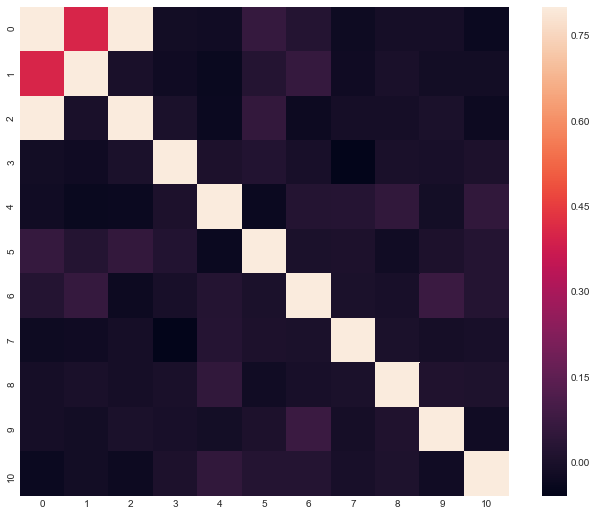

In [35]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.838121398771
R-squared PLSR: 0.838121299199


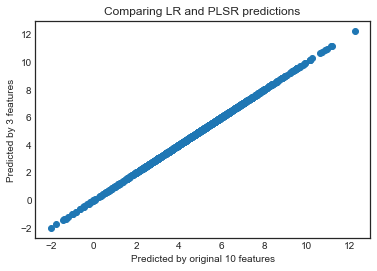

In [36]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.838121398771
R-squared PLSR: 0.83812139877


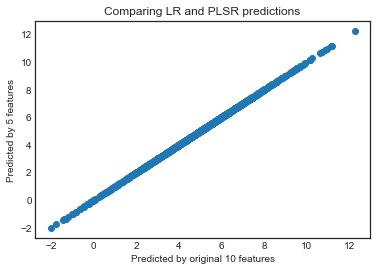

In [37]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Increas feature space to 5 dimensions.
pls2 = PLSRegression(n_components=5)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls2.predict(X)
print('R-squared PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Changing the number of components doesn't seem to have much of an impact from 3 to 5, therefore you would want to stick with 3 to reduce the features

R-squared regression: 0.838121398771
R-squared PLSR: 0.838094161374


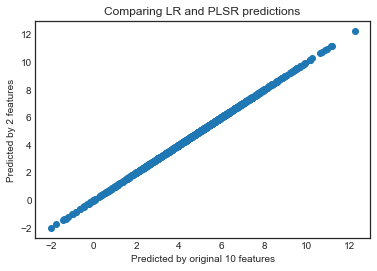

In [38]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls3 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls2.predict(X)
print('R-squared PLSR:', pls3.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Reducing to 2 components lowers the r-squared so it seems that the optimal number of components is 3

In [39]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Coefficients from sklearn: 
 [[ 1.97202649]]

Intercept from sklearn: 
 [ 0.50681653]

Coefficients from gradient descent algorithm: 
 1.97202271407

Intercept from gradient descent algorithm: 
 0.506792847504


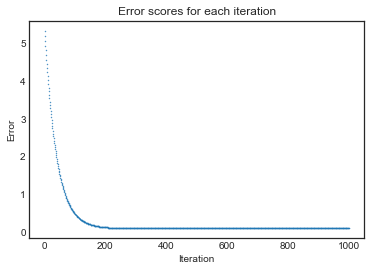

In [40]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    
    # Store the error to instpect later.
    all_error.append(error)

    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()


Coefficients from sklearn: 
 [[ 1.94095934]]

Intercept from sklearn: 
 [ 0.52879198]

Coefficients from gradient descent algorithm: 
 1.71070706688

Intercept from gradient descent algorithm: 
 0.469774431633


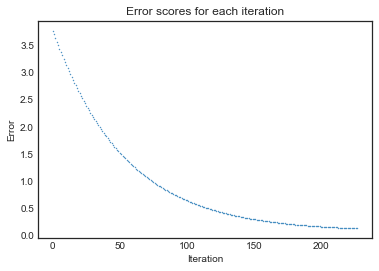

In [56]:
## Cost function for the linear regression that we will try to optimize.
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data.
    
    Alpha and beta are the coeficients that describe the fit line line, while
    x and y are lists or arrays with the x and y value of each data point.
    '''
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision-points described above.
# How many steps to take.
stop = 1000

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start

#Run the algorithm.
for iter in range(stop):
    
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    
    # Store the error to instpect later.
    all_error.append(error)

    
    if len(all_error)<2:
        continue
    elif all_error[-2] - all_error[-1] < .001:
        break
    else:
        continue
        
    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()

In [57]:
len(all_error)

228